
        Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] 
        
        Edges:
        [[10, 5, 8, 10, 8, 5], [13, 9, 3], [12, 9, 7], [10, 8, 1], [10, 7], [0, 11, 12, 9, 6, 0], [13, 11, 5, 13, 9], [9, 4, 2, 12, 9], [0, 0, 13, 3], [7, 2, 5, 11, 6, 7, 1, 13], [0, 11, 4, 0, 13, 3], [6, 10, 5, 9], [2, 5, 7, 13], [6, 1, 10, 8, 6, 12, 9]]
        


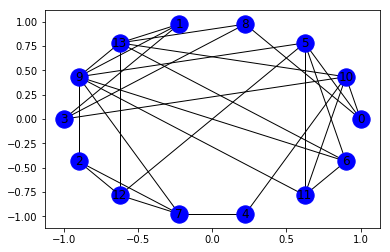

12 4 [12, 2, 9, 7, 4]


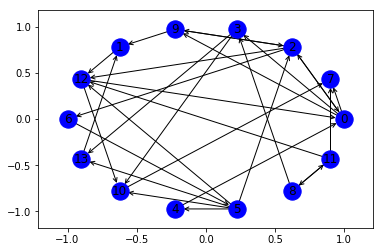

12 4 [12, 0, 2, 6, 5, 4]


In [2]:
import pprint
from collections import deque
from Graph import Graph
from DiGraph import DiGraph
import random


class DepthFirstPaths(object):
    
    def __init__(self, G, s):
        self.G = G
        self.marked = [False for i in range(G.vertices())]
        self.edgeTo = [None for i in range(G.vertices())]
        self.source = s
        self._dfp(s)
    
    def __str__(self):
        return pprint.saferepr(self.edgeTo)
    
    def _dfp(self, s):
        self.marked[s] = True
        for neighbor in self.G.adjacent(s):
            if not self.marked[neighbor]:
                self.edgeTo[neighbor] = s
                self._dfp(neighbor)
                
    def pathTo(self, sink):
        path = deque()
        while self.edgeTo[sink] is not None:
            path.appendleft(sink)
            sink = self.edgeTo[sink]
        if sink != self.source:
            return None
        else:
            path.appendleft(sink)
            return list(path)
            
if __name__ == "__main__":
    nodes = random.randint(1, 20)
    edges = random.randint(0, nodes * int((nodes - 1) / 2))
    g = Graph.generateRandomGraph(nodes, edges)
    print(g)
    g.displayGraph()
    source = random.randint(0, nodes-1)
    dfp = DepthFirstPaths(g, source)
    sink = random.randint(0, nodes-1)
    print(source, sink, dfp.pathTo(sink))
    dg = DiGraph.generateRandomGraph(nodes, edges)
    dg.displayGraph()
    dfp = DepthFirstPaths(dg, source)
    print(source, sink, dfp.pathTo(sink))
    
        
    
    
        
    
        
